In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Monty Hall via Monte Carlo

Show that the solution is true by Monte Carlo opening the door. Door number 0 wins, while 1 and 2 lose. Weird door numbering to enjoy modulo algebra.

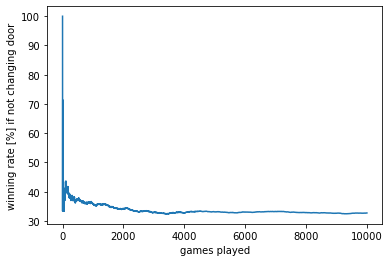

In [4]:
change = False
wins   = 0
rate   = []
n      = 10000

for i in range(1,n+1):
    door = np.random.random_integers(0,2)

    open_door = 2 if door == 1 else 1

    if change :
        door = (door+1) % 3
        if door == open_door:
            door = (door+1) % 3
    if door == 0:
        wins += 1

    rate.append(wins/i*100)

plt.xlabel('games played')
plt.ylabel('winning rate [%] if{}changing door'.format(str(' ' if change else ' not ')))
plt.plot(rate)
plt.show()

### Explanation

Keep the winning door at 0, and let's list all cases, or build the sample space $\Omega:=\{\omega_i\}_{i=1}^6$, where $\mathbb P(\omega_i)=\frac16,\,i=1,..,6$:

1. $\omega_1$: choose 0, switch: lose
2. $\omega_2$: choose 0, keep: win
3. $\omega_3$: choose 1, switch: win
4. $\omega_4$: choose 1, keep: lose
5. $\omega_5$: choose 2, switch: win
6. $\omega_6$: choose 2, keep: lose
    
It is clear already that, switching appears three (equiprobable) times, while switching and winning appears two times, so switching implies more chances to win than to lose, with a ratio 2:1.

One can proceed more formally. The sample space can be partitioned in different ways: win or lose ($W:=\{\omega_2,\omega_3,\omega_5\}$ vs $L:=\{\omega_1,\omega_4,\omega_6\}$); switch or keep ($S:=\{\omega_1,\omega_3,\omega_5\}$ vs $K:=\{\omega_2,\omega_4,\omega_6\}$); choose door 0, 1, or 2  ($0:=\{\omega_1,\omega_2\}$ vs $1:=\{\omega_3,\omega_4\}$ vs $2:=\{\omega_5,\omega_6\}$); The intersections between these subsets individuate the different events.

By direct observation, $\mathbb P(W)=\frac12$, and this is happening only because we allow switching door. If we didn't, one would have to measure it only given the cases 2,4,6, meaning that $\mathbb P(W)=\frac13$. By introducing switching the game becomes fair.

Note:
$$\mathbb P(W\cap S)=\mathbb P(\{\omega_3,\omega_5\})=\frac13\qquad\mathbb P(W\cap K)=\mathbb P(\{\omega_2\})=\frac16,$$
meaning that _before starting playing_, switching is already a promising option, because it actually carries most of the chance of winning than if staying.

_After_ one switches (that is, conditional probability):
$$\mathbb P(W|S)=\frac{\mathbb P(W\cap S)}{\mathbb P(S)}=\frac{\mathbb P(\{\omega_3,\omega_5\})}{\mathbb P(\{\omega_1,\omega_3,\omega_5\})}=\frac 13\bigg/\frac12=\frac23.$$